# 분류(Classification)성능 평가지표
- 정확도(Accuracy)
- 오차행렬(Confusion Matrix)
- 정밀도(Precision)
- 재현율(Recall)
- F1 스코어 - 정밀도와 재현율이 얼마나 균형잡혀있는지 알수있음.
- ROC AUC : 이진분류인 경우 많이 활용

In [16]:
# 폰트 및 마이너스 부호 
warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
font_name  = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

## 01. 정확도(Accuracy)
- ${정확도(Accuracy) = \frac{예측결과가 동일한 데이터 건수}{전체 예측 데이터 건수}}$
- 정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표입니다. 하지만 이진 분류의 경우 데이터 구성에 따라 ML모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지는 않는다.
- 정확도는 불균형한 레이블 값 분포에서 ML모델의 성능을 판단 할 경우, 적합한 평가지표가 아니다.(신용카드 사기검출)

In [17]:
# 널처리 함수 
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace  = True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거 
def drop_features(df):
    """
    errors = 'ignore'옵션은 에러나도 무시함.
             'raise' -     
    """
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True,errors = 'ignore')
    return df

# 레이블 인코딩 수행
def format_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    from sklearn.preprocessing import LabelEncoder
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 앞에서 설정한 데이터 전처리 함수 호출 
def transform_features(df):
    """
    모델적용전 전처리 함수 
    """
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

* 남자인 경우는 사망. 즉, 0 
* 여자인 경우는 생존 1 <br>
아주 이렇게 단순한 Estimator를 만든다.정확도의 오류를 보여주기 위해서임.

In [18]:
from sklearn.base import BaseEstimator
class MyDummyClassifier(BaseEstimator):
    '''
    extends BaseEstimator and return Prediction
    '''
    def fit(self, X, y=None):
        '''
        fit메소드는 아무것도 학습하지 않음.
        '''
        pass
    def predict(self, X):
        '''
        predict() 메소드는 단순히 Sex 피처가 1(남자)이면 0, 그렇지 않으면 1로 예측함
        '''
        pred = np.zeros((X.shape[0], 1))  # 입력으로 들어온 데이터프레임의 갯수만큼 1차원 ndarray로 생성
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]== 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [7]:
help(BaseEstimator)

Help on class BaseEstimator in module sklearn.base:

class BaseEstimator(builtins.object)
 |  Base class for all estimators in scikit-learn
 |  
 |  Notes
 |  -----
 |  All estimators should specify all the parameters that can be set
 |  at the class level in their ``__init__`` as explicit keyword
 |  arguments (no ``*args`` or ``**kwargs``).
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __repr__(self, N_CHAR_MAX=700)
 |      Return repr(self).
 |  
 |  __setstate__(self, state)
 |  
 |  get_params(self, deep=True)
 |      Get parameters for this estimator.
 |      
 |      Parameters
 |      ----------
 |      deep : bool, default=True
 |          If True, will return the parameters for this estimator and
 |          contained subobjects that are estimators.
 |      
 |      Returns
 |      -------
 |      params : mapping of string to any
 |          Parameter names mapped to their values.
 |  
 |  set_params(self, **params)
 |      Set the parameters of this es

## 타이타닉 생존자 예측 수행
* 단순한 알고리즘으로 예측수행시 문제점

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터 / 테스트 데이터 분할
titanic_df = pd.read_csv("../03.Scikit-Learn/titanic/titanic_train.csv")

X_titanic_df = titanic_df.drop('Survived', axis = 1)
y_titanic_df = titanic_df['Survived']
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=2021)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print("DummyClassifier의 정확도 : {0:.4f}".format(accuracy_score(y_test, mypredictions)))

DummyClassifier의 정확도 : 0.7207


### 불균형한 MNIST데이터세트를 이용한 예측정확도 측정

In [33]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import pandas as pd

In [24]:
class MyFakeClassifier(BaseEstimator):
    '''
    No fit, just predict
    '''
    def fit(self, X, y):
        pass
    def predict(self, X):
        """
        들어오는 X데이터세트의 크기만큼 모든 값을 0으로 만들어서 반환
        """
        return np.zeros(shape=(len(X), 1), dtype=bool)

In [28]:
# 사이킷런의 내장 데이터세트인 load_digits()를 이용해 MINIST데이터 세트 로딩
digits = load_digits()

In [29]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 2021)
pd.DataFrame({"변환값": y, "원래값": digits.target})

### 비정상적은 Classifier를 이용한 예측과 평가

In [34]:
#불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 : ', y_test.shape, type(y_test))
print('테스트 세트 레이블 0과 1의 분포도:\n',pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeClf = MyFakeClassifier()

fakeClf.fit(X_train, y_train)
fakepred = fakeClf.predict(X_test)

print("모든 예측을 0으로 하여도 정확도는 : {0:.4f}".format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 :  (450,) <class 'numpy.ndarray'>
테스트 세트 레이블 0과 1의 분포도:
 0    408
1     42
dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.9067


## 정리
* 정확도 평가 지표는 불균형한 레이블 데이터세트에서는 성능 수치로 사용되서는 안됨.
* 정확도가 가지는 분류 평가 지표로서, 이런 한계점을 극복하기 위해 오차행렬(Confusion Matrix)가 적용될수 있음.

## 02. 오차행렬(Confusion Matrix)
* 학습된 분류모델이 예측을 수행하면 얼마나 헛갈리고 있는지도 함께 보여주는 지표
* 아래 그림 참조

In [20]:
from IPython.display import Image
import os

In [21]:
os.getcwd()

'C:\\dataAnalysis\\philosophy_datascience\\01.ML\\03.Scikit-Learn'

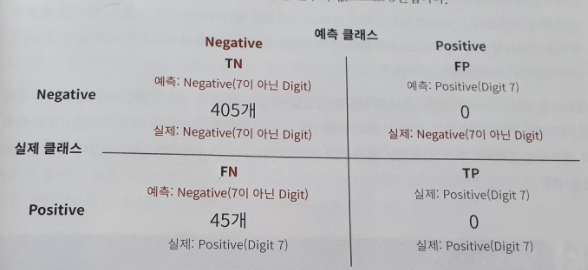

In [22]:
Image("C:/dataAnalysis/philosophy_datascience/img/confusionmatrix.png")

### MyFakeClassifier을 이용한 오차행렬 출력

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)

array([[408,   0],
       [ 42,   0]], dtype=int64)

In [37]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

* `정확도`는 데이터가 한쪽으로 편중되어 있는 데이터세트인 경우는 신뢰도가 떨어지기때문에 이를 보완하기 위해서 
`정밀도`와 `재현률`에 대해서 알아보기로 한다.
* `정확도` = `예측 결과와 실제값이 동일한 건수 / 전체 데이터 건수 = (TN + TP) / (TN + TP + FN + FP)`

## 03. 정밀도와 재현율
* `정밀도`와 `재현율`은 Positive 데이터 세트의 예측 성능에 더 초점을 맞춘 평가 지표.
* **`정밀도 = TP / (FP + TP)`** : 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
* **`재현율 = TP / (FN + TP)`** : 실제값이 Positive인 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score


def get_clf_eval(y_test, pred= None, pred_proba = None):
    """
    오차행렬, 정확도, 정밀도, 재현율을 리턴하는 함수
    정밀도와 재현율을 결합한 F1 스코어 추가 
    ROC AUC커브 추가 
    """
    confusion  = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred_proba)
    print("오차 행렬")
    print(confusion)
    print("정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, \
                F1 스코어 : {3:.4f}, FOC AUC값 : {4:.4f}".format(accuracy, precision, recall, f1, roc_score))

### 로지스틱회귀 기반으로 타이타닉 생존자 예측/평가 수행

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩 , 데이터 가공, 전처리, 학습 /테스트 데이터 분할
titanic_df = pd.read_csv("./titanic/titanic_train.csv")

# 레이블 데이터 
y_titanic_df = titanic_df['Survived']

# 학습용
# .drop()는 해당 컬럼을 제거하고 남은 데이터셋을 리턴한다.
X_titanic_df = titanic_df.drop('Survived', axis = 1)

# 데이터가공 및 전처리 
X_titanic_df = transform_features(X_titanic_df)

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[105  13]
 [ 12  49]]
정확도 : 0.8603, 정밀도 : 0.7903, 재현율 : 0.7903


In [55]:
X_train.shape[0], X_test.value_counts()

(712,
 Pclass  Sex  Age        SibSp  Parch  Fare     Cabin  Embarked
 3       1    29.699118  0      0      8.0500   146    3           6
 2       1    29.699118  0      0      0.0000   146    3           3
 3       1    29.699118  0      0      7.8958   146    3           2
         0    29.699118  0      0      7.7500   146    2           2
         1    29.699118  0      0      7.7500   146    2           2
                                                                  ..
         0    39.000000  1      5      31.2750  146    3           1
                         0      5      29.1250  146    2           1
              38.000000  1      5      31.3875  146    3           1
              31.000000  0      0      8.6833   146    3           1
 1       0    16.000000  0      1      39.4000  99     3           1
 Length: 165, dtype: int64)

In [54]:
y_train.value_counts(), y_test.value_counts()

(0    431
 1    281
 Name: Survived, dtype: int64,
 0    118
 1     61
 Name: Survived, dtype: int64)

* 정밀도에 비해서 재현율이 낮게 나왔다.재현율 혹은 정밀도를 높힐수 있는 방법은?

### 정밀도 / 재현율 trade-off관계
* 정밀도를 올리자니 재현율이 떨어지고, 재현율을 올리자니 정밀도가 떨어지는 관계.
* `predict_proba()`를 활용해서 예측확률값을 확인

In [66]:
# 각각의 개별 데이터별로 예측확률을 리턴
pred_proba = lr_clf.predict_proba(X_test)
print(" pred_proba() 결과 Shape : {0}".format(pred_proba.shape))
print(" pred_proba의 결과 앞의 3개만 보기  :\n ", pred_proba[:3,:])

# 예측결과 값
pred = lr_clf.predict(X_test)
print("pred의 타입 : ", type(pred))
print(" pred의 결가 앞의 3개만 보기 : \n", pred[:3])

# 예측확률 array와 예측결과값 array를 병합해 한눈에 보기 
pred_proba_result = np.concatenate([pred_proba,  pred.reshape(-1,1)], axis = 1)

print("\n두개의 class중에서 더 큰 확률을 클래스 값으로 예측 \n", pred_proba_result[:3])

 pred_proba() 결과 Shape : (179, 2)
 pred_proba의 결과 앞의 3개만 보기  :
  [[0.44555909 0.55444091]
 [0.84758967 0.15241033]
 [0.8576123  0.1423877 ]]
pred의 타입 :  <class 'numpy.ndarray'>
 pred의 결가 앞의 3개만 보기 : 
 [1 0 0]

두개의 class중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44555909 0.55444091 1.        ]
 [0.84758967 0.15241033 0.        ]
 [0.8576123  0.1423877  0.        ]]


* 결과값에서 보듯이 `1`로 예측한 경우는 `1`의 **예측확률이 더 크고** `0`으로 예측한 경우는 `0`의 **예측확률이 더 큼**을 알수있다.

### 사이킷런의 정밀도/재현율 트래이드오프 방식 이해
* Binarizer클래스 객체 이용

In [69]:
from sklearn.preprocessing import Binarizer


X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]
    ]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1).fit(X)
print(binarizer.transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [70]:
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [67]:
help(Binarizer)

Help on class Binarizer in module sklearn.preprocessing._data:

class Binarizer(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Binarizer(*, threshold=0.0, copy=True)
 |  
 |  Binarize data (set feature values to 0 or 1) according to a threshold
 |  
 |  Values greater than the threshold map to 1, while values less than
 |  or equal to the threshold map to 0. With the default threshold of 0,
 |  only positive values map to 1.
 |  
 |  Binarization is a common operation on text count data where the
 |  analyst can decide to only consider the presence or absence of a
 |  feature rather than a quantified number of occurrences for instance.
 |  
 |  It can also be used as a pre-processing step for estimators that
 |  consider boolean random variables (e.g. modelled using the Bernoulli
 |  distribution in a Bayesian setting).
 |  
 |  Read more in the :ref:`User Guide <preprocessing_binarization>`.
 |  
 |  Parameters
 |  ----------
 |  threshold : float, optional (0.0 by def

### Binarizer클래스를 이용한 사이킷런의 예측 코드 작성
* 임계치 0.5, 0.4

### fit() -> transform()

In [77]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류결정 임계값
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 컬럼. 즉, Positive클래스 칼람 하나만 추출해 Binarizer클래스 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer1 = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer1.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[105  13]
 [ 12  49]]
정확도 : 0.8603, 정밀도 : 0.7903, 재현율 : 0.7903


### fit_transform()

In [78]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer2 = Binarizer(threshold = custom_threshold)
custom_predict = binarizer2.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[105  13]
 [ 12  49]]
정확도 : 0.8603, 정밀도 : 0.7903, 재현율 : 0.7903


### 임계치를 0.4로 변경

In [85]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)
binarizer04 = Binarizer(threshold = custom_threshold)
binarizer04.fit(pred_proba_1)
custom_predict = binarizer04.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[103  15]
 [ 11  50]]
정확도 : 0.8547, 정밀도 : 0.7692, 재현율 : 0.7692


**분류결정 임계값**을 낮추면 True가 많아지게 되므로 정밀도는 떨어지고 재현율은 높아진다.

### 임계치를 통한 평가지표 조사

In [86]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, threshold):
    """
    threshold list객체 내의 값을 차례로 iteration하면서
    Evaluation수행
    """
    for custom_threshold in thresholds:
        binarizerT = Binarizer(threshold = customer_threshold).fit(pred_proba_c1)
        custom_predict = binarizerT.transform(pred_proba_c1)
        print("임계값 : ", custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)        

임계값 :  0.4
오차 행렬
[[103  15]
 [ 11  50]]
정확도 : 0.8547, 정밀도 : 0.7692, 재현율 : 0.7692
임계값 :  0.45
오차 행렬
[[103  15]
 [ 11  50]]
정확도 : 0.8547, 정밀도 : 0.7692, 재현율 : 0.7692
임계값 :  0.5
오차 행렬
[[103  15]
 [ 11  50]]
정확도 : 0.8547, 정밀도 : 0.7692, 재현율 : 0.7692
임계값 :  0.55
오차 행렬
[[103  15]
 [ 11  50]]
정확도 : 0.8547, 정밀도 : 0.7692, 재현율 : 0.7692
임계값 :  0.6
오차 행렬
[[103  15]
 [ 11  50]]
정확도 : 0.8547, 정밀도 : 0.7692, 재현율 : 0.7692


### Precision_recall_curve()를 이용해 타이타닉 예측모델의 임계값별 정밀도와 재현율 비교

In [97]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve()인자로 입력
precision, recall, thresholds  = precision_recall_curve(y_test, pred_proba_class1)

print("반환된 분류 결정 임계값 배열의 Shape :", thresholds.shape)
print("반환된 임계값별 정밀도 ", precision[:3])
print("반환된 임계값별 재연률 ", recall[:3])
print(type(thresholds))
# 반횐된 임계값 배열 로우가 155이므로 샘플로 20건만 추출하되, 임계값을 20step로 추출 
thr_index = np.arange(0,  thresholds.shape[0], 20)

print("\n샘츨 추출을 위한 임계값 배열의 index 20개 ", thr_index)
print("\n샘플 20개의 임계값 :", np.round(thresholds[thr_index], 2))

# 20step 단위로 추출된 임계값에 따른 정밀도 재현율 값
print("\n 샘플 임계값별 정밀도 :", np.round(precision[thr_index], 2))
print("\n 샘플 임계값별 재현률 :", np.round(recall[thr_index], 2))

반환된 분류 결정 임계값 배열의 Shape : (155,)
반환된 임계값별 정밀도  [0.36094675 0.35714286 0.35928144]
반환된 임계값별 재연률  [1.         0.98360656 0.98360656]
<class 'numpy.ndarray'>

샘츨 추출을 위한 임계값 배열의 index 20개  [  0  20  40  60  80 100 120 140]

샘플 20개의 임계값 : [0.09 0.14 0.15 0.21 0.32 0.57 0.68 0.88]

 샘플 임계값별 정밀도 : [0.36 0.4  0.48 0.56 0.68 0.81 0.94 0.94]

 샘플 임계값별 재현률 : [1.   0.97 0.93 0.9  0.85 0.75 0.56 0.25]


**위에서 보는 바와 같이 임계값이 증가할수록 정밀도는 높아지나, 재현률은 낮아짐을 보인다.**

In [35]:
help(precision_recall_curve)

Help on function precision_recall_curve in module sklearn.metrics._ranking:

precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)
    Compute precision-recall pairs for different probability thresholds
    
    Note: this implementation is restricted to the binary classification task.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The last precision and recall values are 1. and 0. respectively and do not
    have a corresponding threshold.  This ensures that the graph starts on the
    y axis.
    
  

### 정밀도 재현율 곡선 시각화

(0.0, 1.0)

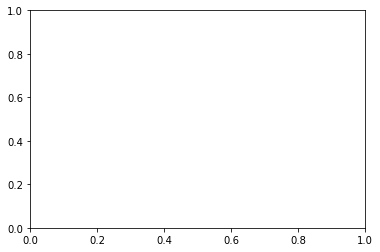

In [100]:
plt.xlim()  # 시작값: 0.0, 종료값 : 1.0을 갖는 그림을 그림.현재의 눈금을 리턴

(0.0, 10.0)

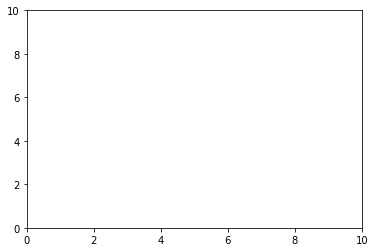

In [102]:
plt.xlim(0, 10)  # 이렇게 값을 지정할수도 있다. 
plt.ylim(0, 10)

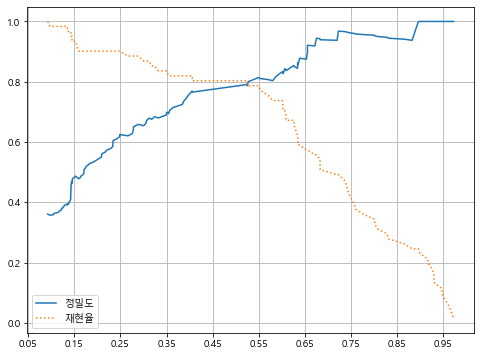

In [107]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curver_plot(y_test, pred_proba_c1):
    # threshold ndarray와 threshold에 따른 정밀도, 재현율 ndarray추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로 ,Y축은 정밀도, 재현율값으로 각각 plot수행, 정밀도 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '-', label = '정밀도')
    plt.plot(thresholds, recalls[0:threshold_boundary], linestyle = 'dotted', label = '재현율')
    
    # threshold값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.legend();plt.grid()
    plt.show()
    
precision_recall_curver_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

#### 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율이 극도록 높아짐.
#### 정밀도 값이 극히 낮아짐.
#### 임계값을 계속 증가시킬수록 재현율이  계속 낮아지고, 정밀도는 증가함. 임계값은 마지노선의 의미이다.

## 04. F1 스코어
* F1 스코어는 정밀도와 재현율을 결합한 지표
* F1 = 2 * ((precision * recall)/ (precision + recall))

In [115]:
# 로지스틱회귀 기반으로 타이타닉 생존자 예측치
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print("F1 스코어 : {0:.4f}".format(f1))

F1 스코어 : 0.7967


### 임계값별 정확도 ,정밀도, 재현율, F1스코어보기

In [119]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)  

임계값 :  0.4
오차 행렬
[[103  15]
 [ 11  50]]
정확도 : 0.8547, 정밀도 : 0.7692, 재현율 : 0.7692, F1 스코어 : 0.7937
임계값 :  0.45
오차 행렬
[[103  15]
 [ 11  50]]
정확도 : 0.8547, 정밀도 : 0.7692, 재현율 : 0.7692, F1 스코어 : 0.7937
임계값 :  0.5
오차 행렬
[[103  15]
 [ 11  50]]
정확도 : 0.8547, 정밀도 : 0.7692, 재현율 : 0.7692, F1 스코어 : 0.7937
임계값 :  0.55
오차 행렬
[[103  15]
 [ 11  50]]
정확도 : 0.8547, 정밀도 : 0.7692, 재현율 : 0.7692, F1 스코어 : 0.7937
임계값 :  0.6
오차 행렬
[[103  15]
 [ 11  50]]
정확도 : 0.8547, 정밀도 : 0.7692, 재현율 : 0.7692, F1 스코어 : 0.7937


## 05. ROC곡선과 AUC
* ROC곡선과 이에 기반한 AUC스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표
* 사이킷런의 roc_curve() API이면 반환값은 FPR, TPR, 임계값이다.

#### roc_curve() 이용한 타이타닉 생존자 예측모델의 FPR, TPR, 임계값 구하기

In [123]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

#반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 로 임의설정됨, 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print("샘플 추출을 위한 임계값 배열 인덱스 : ", thr_index)
print("샘플 인덱스로 추출한 임계값 : ", np.round(thresholds[thr_index], 2))

# 5 steps단위로 추출된 임계값에 따른 FPR, TPR
print("\n샘플 임계값 FPR : ", np.round(fprs[thr_index], 3))
print("샘플 임계값 TPR : ", np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열 인덱스 :  [ 1  6 11 16 21 26 31 36 41 46 51 56]
샘플 인덱스로 추출한 임계값 :  [0.97 0.72 0.64 0.61 0.55 0.35 0.31 0.23 0.15 0.14 0.14 0.09]

샘플 임계값 FPR :  [0.    0.017 0.042 0.068 0.093 0.186 0.212 0.305 0.551 0.636 0.695 0.915]
샘플 임계값 TPR :  [0.016 0.492 0.59  0.672 0.787 0.82  0.869 0.902 0.934 0.951 0.967 1.   ]


In [121]:
help(roc_curve)

Help on function roc_curve in module sklearn.metrics._ranking:

roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC)
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    
    y_true : array, shape = [n_samples]
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.
    
    y_score : array, shape = [n_samples]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int or str, default=None
        The label of the positive class.
        When ``pos_label=None``, if y_true is in {-1, 1} or {0, 1},
        ``pos_label`` is set to 

### FPR변화에 따른 TPR변환 시각화

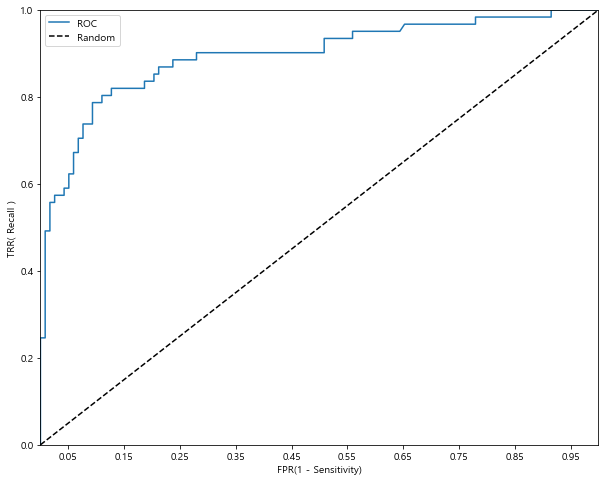

In [130]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    # ROC곡선을 그래프 곡선으로 긂.
    plt.figure(figsize = (10, 8))
    plt.plot(fprs, tprs, label = 'ROC')
    
    # 가운데 대각선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
    
    # FPR X축의 scale을 0.1단위로 변경, X, Y축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("FPR(1 - Sensitivity)"); plt.ylabel("TRR( Recall )")
    plt.legend()
    plt.show()
    
#호출 
roc_curve_plot(y_test, pred_proba[:,1])

* ROC곡선 자체는 FPR과 TPR의 변화 값을 보는데 이용
* 분류의 성능 지표로 사용되는것은 ROC곡선 면적에 기반의 AUC값으로 결정.
* AUC(Area Under Curve)값은 ROC곡선 밑의 면적으로 구한것으로 일반적으로 1에 가까울수로고 좋은 수치입니다.
* AUC 수치가 커지려면 FPR이 작은 상태애서 얼마나 큰 TPR을 얻을 수 있느냐가 관건입니다.
* 가운데 직선에서 멀어지고 왼쪽 상단 모서리쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 고건이 되어 면적이 1에 가까워지는 좋은 ROC AUC성능 수치를 얻게 됩니다. 
* 가운데 대각선은 랜덤수준(동전 던기지) 이진 분류 AUC값으로 0.5입니다.따라서 보통의 분류는 0.5 이상의 AUC값을 갖는다.

In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

print(confusion_matrix(y_test, pred))
print("정확도 : ", np.round(accuracy_score(y_test, pred), 4))
print("정밀도 : ", np.round(precision_score(y_test, pred), 4))
print("재현율 : ", np.round(recall_score(y_test, pred), 4))

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print("RCO AUC값 : {0:.4f}".format(roc_score))

[[105  13]
 [ 12  49]]
정확도 :  0.8603
정밀도 :  0.7903
재현율 :  0.8033
RCO AUC값 : 0.8953
